In [1]:
import numpy as np
import scipy.io as sio
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

# 主成分分析法(PCA)

## 读取数据

In [3]:
paths = glob.glob("data/*/*.mat")
data = sio.loadmat(paths[0])
keys = list(data.keys())
datax = data.get(keys[-1])

## 预览数据

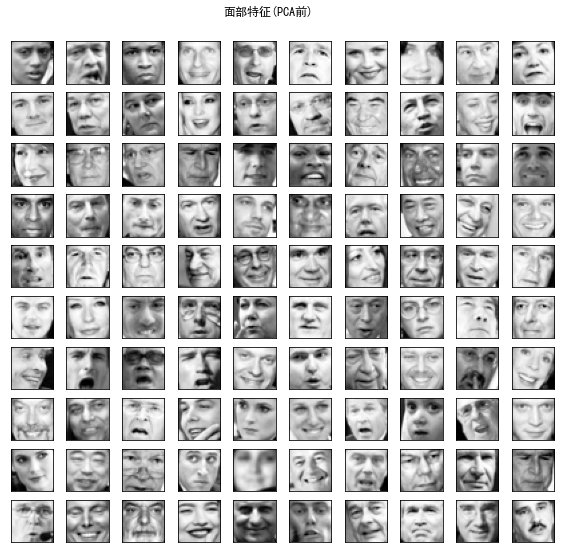

In [4]:
pos = np.random.randint(datax.shape[0], size=100)

plt.close(1)
fig, axes = plt.subplots(10, 10, sharex=True, sharey=True, num=1, figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(0.05, 0.05, 1, 0.92)
plt.suptitle("面部特征(PCA前)")

for r in range(10):
    for c in range(10):
        axes[r, c].imshow(datax[pos[r * 10 + c], :].reshape((32, 32)).T, cmap=plt.cm.Greys_r)

## 特征值分解

In [5]:
scaler = StandardScaler()
scaler_x = scaler.fit_transform(datax) # 去中心化
cov_x = np.cov(scaler_x.T)
eig_vals, eig_vecs = np.linalg.eig(cov_x)
percentage = eig_vals / np.sum(eig_vals)
cumpercentage =np.cumsum(percentage)
plt.close(2)
plt.figure()
plt.bar(range(percentage[:100].shape[0]), percentage[:100])
plt.step(range(cumpercentage[:100].shape[0]), cumpercentage[:100], where="post")

## PCA降维

In [ ]:
pca_x = scaler_x @ eig_vecs[:, :100] # 降维
X1 = scaler.inverse_transform(pca_x @ eig_vecs[:, :100].T) # 还原

## PCA还原

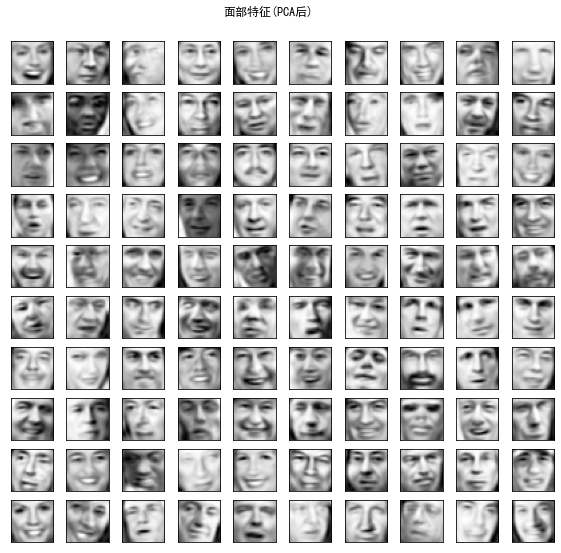

In [ ]:
plt.close(3)
fig, axes = plt.subplots(10, 10, sharex=True, sharey=True, num=3, figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(0.05, 0.05, 1, 0.92)
plt.suptitle("面部特征(PCA后)")

for r in range(10):
    for c in range(10):
        axes[r, c].imshow(X1[pos[r * 10 + c], :].reshape((32, 32)).T, cmap=plt.cm.Greys_r)

## 奇异值分解

In [ ]:
x_scaler = scaler.fit_transform(datax)
U, S, V = np.linalg.svd(x_scaler.T @ x_scaler)
k = 100
x_pca = x_scaler @ U[:, :k]
X2 = scaler.inverse_transform(x_pca @ U[:, :k].T)

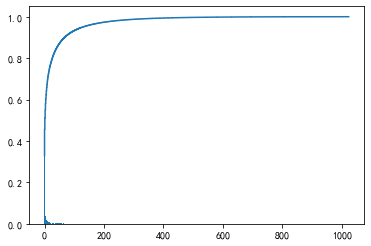

In [ ]:
plt.close(4)
plt.figure()
plt.bar(range(len(S)), S / np.sum(S))
plt.step(range(len(S)), np.cumsum(S / np.sum(S)))

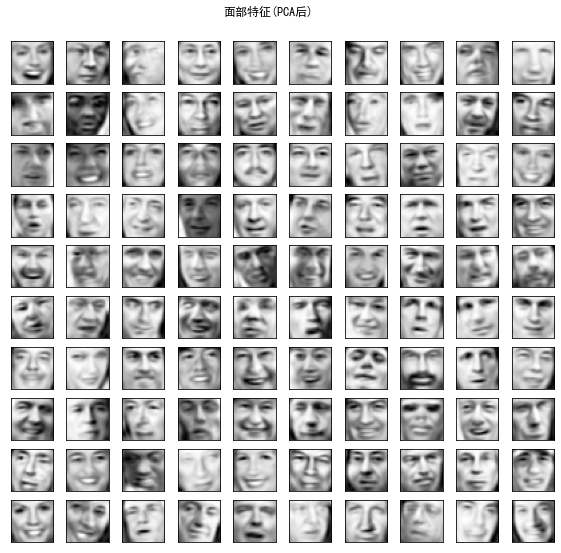

In [ ]:
plt.close(5)
fig, axes = plt.subplots(10, 10, sharex=True, sharey=True, num=5, figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(0.05, 0.05, 1, 0.92)
plt.suptitle("面部特征(PCA后)")

for r in range(10):
    for c in range(10):
        axes[r, c].imshow(X2[pos[r * 10 + c], :].reshape((32, 32)).T, cmap=plt.cm.Greys_r)

In [ ]:
pca = PCA(n_components=100)
X3 = pca.fit_transform(x_scaler)
X3_original = pca.inverse_transform(X3)
X3_original = scaler.inverse_transform(X3_original)

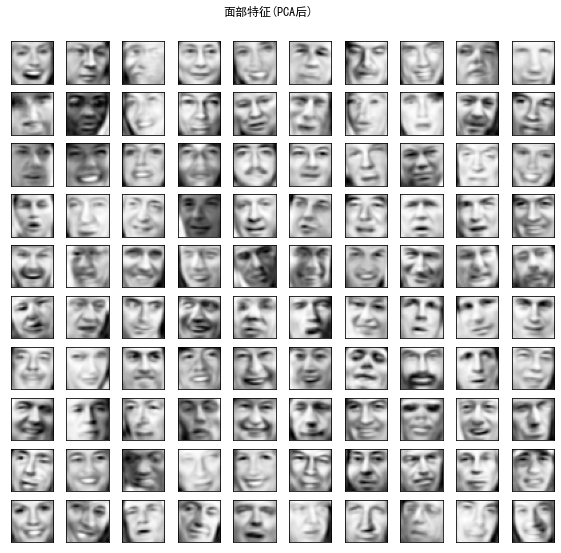

In [ ]:
plt.close(6)
fig, axes = plt.subplots(10, 10, sharex=True, sharey=True, num=6, figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(0.05, 0.05, 1, 0.92)
plt.suptitle("面部特征(PCA后)")

for r in range(10):
    for c in range(10):
        axes[r, c].imshow(X3_original[pos[r * 10 + c], :].reshape((32, 32)).T, cmap=plt.cm.Greys_r)